In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
from subprocess import call
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
import time

def FitPredict(modelType, model, X_train, X_test, Y_train,  Y_test):
    
    print(modelType)
    start = time.time()
    model.fit(X_train, Y_train.ravel())
    end = time.time()
    print("Training Time: " + str(end - start))
    start = time.time()
    Y_Pred = model.predict(X_test)
    end = time.time()
    print("Testing Time: " + str(end - start))
    count = 0
    M, N = X_test.shape
    print(M)
    for N in range(M):
        if Y_Pred[N] == Y_test[N]:
            count = count + 1
            
    print(count)
    accuracy = 0
    accuracy = count/M
    print(accuracy)
    print(float(f1_score(Y_test, Y_Pred)))
    c = confusion_matrix(Y_test, Y_Pred, labels=[0,1])
    print(c)
    print('')
    print('')
    return model, Y_Pred

ML Function
Random Forest
Multi Layer Perceptron
Support Vector Classifier
KNN


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
import time

def ML(X_train, X_test, Y_train, Y_test):
    
    RFclassifier, Y_Pred_RF = FitPredict("Random Forest",RandomForestClassifier(n_estimators=100), X_train, X_test, Y_train, Y_test)
    
    MLPclassifier, Y_Pred_MLP = FitPredict("MLP", MLPClassifier(random_state = np.random.RandomState(), max_iter = 500, shuffle = True), X_train, X_test, Y_train, Y_test)
      
    SVCclassifier, Y_Pred_SVC =  FitPredict("SVC", svm.SVC(gamma = 2, C=1, probability=True), X_train, X_test, Y_train, Y_test)
       
    SVCLinclassifier, Y_Pred_SVCLin = FitPredict("SVC Linear", svm.SVC(kernel='linear', C=0.0025, probability=True), X_train, X_test, Y_train, Y_test)
    
    NBclassifier, Y_Pred_NB = FitPredict("Naive Bayes", GaussianNB(), X_train, X_test, Y_train, Y_test)
       
    KNNclassifier, Y_Pred_KNN = FitPredict("KNN", neighbors.KNeighborsClassifier(), X_train, X_test, Y_train, Y_test)
        
    stackingModels = [('RF', RandomForestClassifier(n_estimators=100)),('MLP', MLPClassifier(random_state = np.random.RandomState(), max_iter = 500, shuffle = True)),('Naive Bayes', GaussianNB()), ('KNN', neighbors.KNeighborsClassifier()), ('RBF SVC', svm.SVC(gamma = 2, C=1, probability=True)), ('LIN SVC', svm.SVC(kernel='linear', C=0.0025, probability=True))]
    stacking, Y_Pred_Stack = FitPredict("Stacking", StackingClassifier(estimators=stackingModels), X_train, X_test, Y_train, Y_test)
     
    hVotingModels = [('RF', RandomForestClassifier(n_estimators=100)),('MLP', MLPClassifier(random_state = np.random.RandomState(), max_iter = 500, shuffle = True)),('Naive Bayes', GaussianNB()), ('KNN', neighbors.KNeighborsClassifier()), ('RBF SVC', svm.SVC(gamma = 2, C=1, probability=True)), ('LIN SVC', svm.SVC(kernel='linear', C=0.0025, probability=True))]
    HVoting, Y_Pred_HVoting = FitPredict("Hard Voting - All Models", VotingClassifier(estimators=hVotingModels, voting='hard'), X_train, X_test, Y_train, Y_test)
    
    sVotingModels = [('RF', RandomForestClassifier(n_estimators=100)),('MLP', MLPClassifier(random_state = np.random.RandomState(), max_iter = 500, shuffle = True)),('Naive Bayes', GaussianNB()), ('KNN', neighbors.KNeighborsClassifier()), ('RBF SVC', svm.SVC(gamma = 2, C=1, probability=True)), ('LIN SVC', svm.SVC(kernel='linear', C=0.0025, probability=True))]
    SVoting, Y_Pred_SVoting = FitPredict("Soft Voting - All Models", VotingClassifier(estimators=sVotingModels, voting='soft'), X_train, X_test, Y_train, Y_test)
    
    return {"RF":[RFclassifier,Y_Pred_RF],"MLP":[MLPclassifier,Y_Pred_MLP],"SVC":[SVCclassifier,Y_Pred_SVC],"SVCLin":[SVCLinclassifier,Y_Pred_SVCLin],"NB":[NBclassifier,Y_Pred_NB],"KNN":[KNNclassifier,Y_Pred_KNN],"Stacking":[stacking,Y_Pred_Stack],"HVoting":[HVoting,Y_Pred_HVoting],"SVoting":[SVoting,Y_Pred_SVoting]}

Here I import the data sets, the Host data every 5 seconds and Netflows for each of the devices.
The labels and data have been split in preperation for being fed into the classifiers
in the NetwFlow data the start and end timestamps of each flow have been removed as I believe the ML would just use the timestamp to identify the anomolous and non-anomoulous flows. 

In [3]:
import os
import pandas as pd
import shutil
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib


def DataProcess(path):
    HostDataFiles = os.listdir(path + "/HostData-5s")
    NetFlowFiles = os.listdir(path + "/NetFlow")
    Host = pd.DataFrame([])
    NetFlow = pd.DataFrame([])
    folder = path.split("/")[5]
    #for j in HostDataFiles:
    #    df = pd.read_csv(path+ "/HostData-5s/" + j)  
    #    df = df[["mem", "temp", "time", "tasks", "volt", "cpu", "Label"]]
    #    del df['time'] 
    #    df = df[['Label'] + [c for c in df if c not in ['Label']]]
    #    Host = Host.append(df)
    #for j in NetFlowFiles:
    #    df = pd.read_csv(path + "/NetFlow/" + j, index_col=0 )    
    #    del df['ts']
    #    del df['te']
    #    df = df[['Label'] + [c for c in df if c not in ['Label']]]
    #    NetFlow = NetFlow.append(df)
    df = pd.read_csv(path+ "/HostData-5s/"+folder+"_L.csv")  
    df = df[["mem", "temp", "time", "tasks", "volt", "cpu", "Label"]]
    del df['time'] 
    df = df[['Label'] + [c for c in df if c not in ['Label']]]
    Host = Host.append(df)
    df = pd.read_csv(path+ "/HostData-5s/"+folder+"_I1.csv")  
    df = df[["mem", "temp", "time", "tasks", "volt", "cpu", "Label"]]
    del df['time'] 
    df = df[['Label'] + [c for c in df if c not in ['Label']]]
    Host = Host.append(df)

    df = pd.read_csv(path + "/NetFlow/"+folder+"_L.csv", index_col=0 )    
    del df['ts']
    del df['te']
    df = df[['Label'] + [c for c in df if c not in ['Label']]]
    for i in range(150):
        NetFlow = NetFlow.append(df)
    
    df = pd.read_csv(path + "/NetFlow/"+folder+"_I1.csv", index_col=0 )    
    del df['ts']
    del df['te']
    df = df.reset_index()  
    df = df[['Label'] + [c for c in df if c not in ['Label']]]
    labels = []
    for index, row in df.iterrows():
        if row["Label"] == 0:
            labels.append(index)
    df = df.drop(labels)
    for i in range(1):
        NetFlow = NetFlow.append(df)
   
    
    HostLabel = np.array(Host.iloc[:, :1])
    NetFlowLabel = np.array(NetFlow.iloc[:, :1])
    HostData = np.array(Host.iloc[:, 1:])
    scaler = StandardScaler()
    HostData = scaler.fit_transform(HostData)
    joblib.dump(scaler, 'HostScaler.pkl', compress=9)
    #da = np.array(HostData)
    
    NetFlowData = np.array(NetFlow.iloc[:, 1:]) 

    return HostLabel, NetFlowLabel, HostData, NetFlowData


MC Data

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy

MCHostTargets, MCNetFlowTargets, MCHostInputs, MCNetFlowInputs = DataProcess("C:/Users/james/Downloads/MC/MC")

SCHostTargets, SCNetFlowTargets, SCHostInputs, SCNetFlowInputs = DataProcess("C:/Users/james/Downloads/SC/SC")

STHostTargets, STNetFlowTargets, STHostInputs, STNetFlowInputs = DataProcess("C:/Users/james/Downloads/ST/ST")

HostTargets = np.concatenate((MCHostTargets, SCHostTargets, STHostTargets), axis = 0)
NetFlowTargets = np.concatenate((MCNetFlowTargets, SCNetFlowTargets, STNetFlowTargets), axis = 0)
HostInputs = np.concatenate((MCHostInputs, SCHostInputs, STHostInputs), axis = 0)
NetFlowInputs = np.concatenate((MCNetFlowInputs , SCNetFlowInputs , STNetFlowInputs ), axis = 0)
count1 = 0
count2 = 0
for i in HostTargets:
    if i == 1:
        count1 = count1 + 1
    elif i == 0:
        count2 = count2 + 1
print("")
print("Benign Entries: " + str(count2))
print("Malicious Entries: " + str(count1))


count1 = 0
count2 = 0
for i in NetFlowTargets:
    if i == 1:
        count1 = count1 + 1
    elif i == 0:
        count2 = count2 + 1
print("")
print("Benign Entries: " + str(count2))
print("Malicious Entries: " + str(count1))


arr = []
ordinalEncoding = {}
count = 0
for i in NetFlowInputs:
    if i[5] not in ordinalEncoding and "." in i[1] and "." in i[2]:
        ordinalEncoding[i[5]] = count
        count += 1
    if "." in i[1] and "." in i[2]:
        arr.append([i[3],i[4]])
    #arr.append([i[3],i[4],ordinalEncoding[i[5]]])
NetFlowInputsPorts = np.array(arr)

#for i in NetFlowInputs:
    #print(i[5])
labels = []
count = 0
arr = []
for i in NetFlowInputs:
    if "." in i[1] and "." in i[2]:
        IP1 = i[1].split(".")
        IP2 = i[2].split(".")
        arr.append([i[3],i[4], int(IP1[0]), int(IP1[1]), int(IP1[2]), int(IP1[3]), int(IP2[0]), int(IP2[1]), int(IP2[2]), int(IP2[3])])        
    else:
        labels.append(count)
    count = count + 1
NetFlowInputsPortsIPs = np.array(arr)
NetFlowTargets = numpy.delete(NetFlowTargets, labels)

print(HostInputs)
X_Host_train, X_Host_test, Y_Host_train, Y_Host_test = train_test_split(HostInputs, HostTargets, test_size=0.3, random_state=42, shuffle=True)
count1 = 0
count2 = 0
for i in Y_Host_test:
    if i == 1:
        count1 = count1 + 1
    elif i == 0:
        count2 = count2 + 1
print("")
print("Benign Entries: " + str(count2))
print("Malicious Entries: " + str(count1))
scaler = StandardScaler()
NetFlowInputsPorts = scaler.fit_transform(NetFlowInputsPorts)
joblib.dump(scaler, 'PortScaler.pkl', compress=9)
print(NetFlowInputsPorts)
X_train_Ports, X_test_Ports, Y_train_Ports, Y_test_Ports = train_test_split(NetFlowInputsPorts, NetFlowTargets, test_size=0.3, random_state=42, shuffle=True)
count1 = 0
count2 = 0
for i in Y_test_Ports:
    if i == 1:
        count1 = count1 + 1
    elif i == 0:
        count2 = count2 + 1
print("")
print("Benign Entries: " + str(count2))
print("Malicious Entries: " + str(count1))

NetflowTargetsIPS = NetFlowTargets
X_train_Ports_IPS, X_test_Ports_IPS, Y_train_Ports_IPS, Y_test_Ports_IPS = train_test_split(NetFlowInputsPortsIPs, NetflowTargetsIPS, test_size=0.3, random_state=42, shuffle=True)
count1 = 0
count2 = 0
for i in Y_test_Ports_IPS:
    if i == 1:
        count1 = count1 + 1
    elif i == 0:
        count2 = count2 + 1
print("")
print("Benign Entries: " + str(count2))
print("Malicious Entries: " + str(count1))


Benign Entries: 2052
Malicious Entries: 2041

Benign Entries: 367500
Malicious Entries: 366083
[[-1.28234569  0.67363376 -1.4239429  -0.52117445 -1.75054379]
 [-1.28205932  0.67363376 -1.4239429  -0.52117445 -1.75054379]
 [-1.28098543  0.62942303 -1.4239429  -0.52117445 -1.74041002]
 ...
 [-0.05184652  1.1786964   0.91149329  0.89985123  1.87143663]
 [-0.14548353  1.21407549  0.91149329  0.89985123  1.87143663]
 [-0.20097212  1.1786964   0.91149329  0.89985123  1.87143663]]

Benign Entries: 619
Malicious Entries: 609
[[-0.96077979  2.50846078]
 [ 1.47787671 -0.27227725]
 [ 1.32446399 -0.57297446]
 ...
 [ 1.21301258 -0.57566651]
 [ 1.23581959 -0.57449826]
 [ 1.21408166 -0.57566651]]

Benign Entries: 86998
Malicious Entries: 84542

Benign Entries: 86998
Malicious Entries: 84542


classifier Tests

In [5]:
import joblib
print("****************************************************************************")
print("Host")
print("")
HostList = ML(X_Host_train, X_Host_test, Y_Host_train, Y_Host_test)
for i in HostList.keys():
    joblib.dump(HostList[i][0], '{}Host.pkl'.format(i), compress=9)
print("****************************************************************************")
print("NetFlow - Ports")
print("")
PortList = ML(X_train_Ports, X_test_Ports, Y_train_Ports, Y_test_Ports)
for i in PortList.keys():
    joblib.dump(PortList[i][0], '{}Port.pkl'.format(i), compress=9)


#print("****************************************************************************")
#print("NetFlow - Ports & IPs")
#print("")
#RFclassifierNetFlowPortIP, Y_Pred_RFNetFlowPortIP, MLPclassifierNetFlowPortIP, Y_Pred_MLPNetFlowPortIP, KNNclassifierNetFlowPortIP, Y_Pred_KNNNetFlowPortIP = ML(X_train_Ports_IPS, X_test_Ports_IPS, Y_train_Ports_IPS, Y_test_Ports_IPS)
#joblib.dump(RFclassifierNetFlowPort, 'NetDataModel.pkl', compress=9)
#joblib.dump(RFclassifierHost, 'HostDataModel.pkl', compress=9)

****************************************************************************
Host

Random Forest
Training Time: 0.14062213897705078
Testing Time: 0.01201009750366211
1228
1227
0.999185667752443
0.9991783073130649
[[619   0]
 [  1 608]]


MLP
Training Time: 3.795759677886963
Testing Time: 0.0024993419647216797
1228
1227
0.999185667752443
0.9991783073130649
[[619   0]
 [  1 608]]


SVC
Training Time: 0.13962030410766602
Testing Time: 0.017015695571899414
1228
1228
1.0
1.0
[[619   0]
 [  0 609]]


SVC Linear
Training Time: 0.15763497352600098
Testing Time: 0.009007930755615234
1228
1189
0.9682410423452769
0.9669211195928753
[[619   0]
 [ 39 570]]


Naive Bayes
Training Time: 0.0010066032409667969
Testing Time: 0.0004978179931640625
1228
1189
0.9682410423452769
0.9669211195928753
[[619   0]
 [ 39 570]]


KNN
Training Time: 0.0020008087158203125
Testing Time: 0.020517349243164062
1228
1228
1.0
1.0
[[619   0]
 [  0 609]]


Stacking
Training Time: 21.364333629608154
Testing Time: 0.0455393791

C:\Users\james\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Time: 115961.54610061646
Testing Time: 1780.8407156467438
171540
171519
0.9998775795732774
0.9998757859496163
[[86998     0]
 [   21 84521]]


Hard Voting - All Models
Training Time: 27210.445449352264
Testing Time: 1800.5311119556427
171540
163163
0.9511659088259298
0.9511986251492821
[[81524  5474]
 [ 2903 81639]]


Soft Voting - All Models
Training Time: 30207.54802441597
Testing Time: 1917.4589529037476
171540
165410
0.9642648944852512
0.9638906233432688
[[83594  3404]
 [ 2726 81816]]




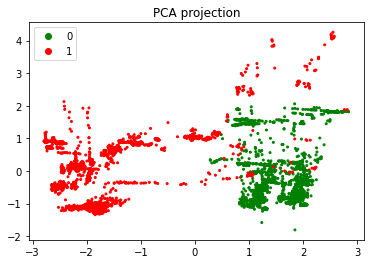

In [6]:
import sklearn.cluster
import sklearn.datasets
import sklearn.decomposition
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(HostInputs)
colors = ListedColormap(['g','r'])
classes = [0,1]
plt.figure()
scatter = plt.scatter(compressed[:,0], compressed[:,1], c=HostTargets, cmap=colors, s=4)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("PCA projection")
plt.show()



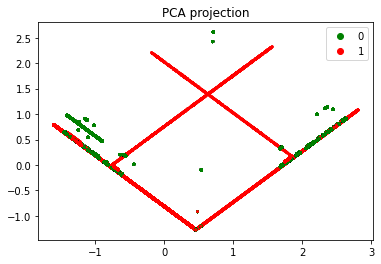

In [7]:
import sklearn.cluster
import sklearn.datasets
import sklearn.decomposition
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(NetFlowInputsPorts)
colors = ListedColormap(['g','r'])
classes = [0,1]
plt.figure()
scatter = plt.scatter(compressed[:,0], compressed[:,1], c=NetFlowTargets, cmap=colors, s=4)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("PCA projection")
plt.show()



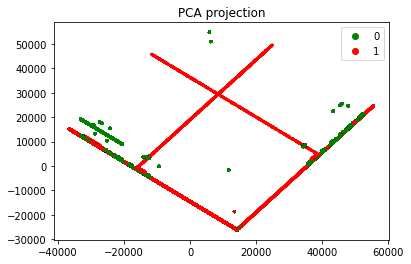

In [8]:
import sklearn.cluster
import sklearn.datasets
import sklearn.decomposition
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(NetFlowInputsPortsIPs)
colors = ListedColormap(['g','r'])
classes = [0,1]
plt.figure()
scatter = plt.scatter(compressed[:,0], compressed[:,1], c=NetflowTargetsIPS, cmap=colors, s=4)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("PCA projection")
plt.show()



In [9]:
import sklearn
 

CV_results = cross_validate(RFclassifierHost, HostInputs, HostTargets.ravel(), cv=20,return_train_score=True)
training = CV_results["train_score"]
testing = CV_results["test_score"]
plt.boxplot([training, testing])
plt.xticks([1, 2], ['training', 'testing'])
plt.show()
labels = [0,1]
c = sklearn.metrics.confusion_matrix(Y_Host_test, Y_Pred_RFHost, labels=labels)
ax= plt.subplot()
plt.title('Confusion matrix of the classifier')
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
cmap = plt.get_cmap('Blues')
im = plt.imshow(c, cmap=cmap, interpolation='nearest')
plt.colorbar(im)
plt.show()
pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(X_Host_test)
plt.figure()
plt.scatter(compressed[:,0], compressed[:,1], c=Y_Pred_RFHost, cmap="viridis")
plt.colorbar()
plt.title("PCA projection")
plt.show()
sklearn.metrics.f1_score(Y_Host_test, Y_Pred_RFHost)

NameError: name 'RFclassifierHost' is not defined

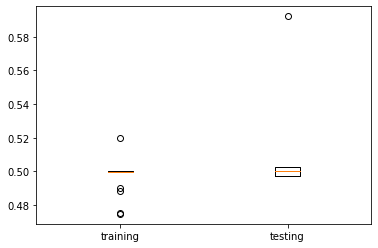

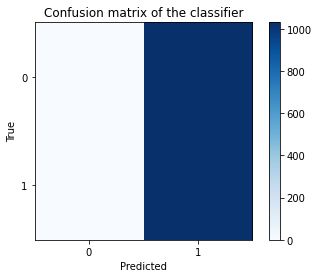

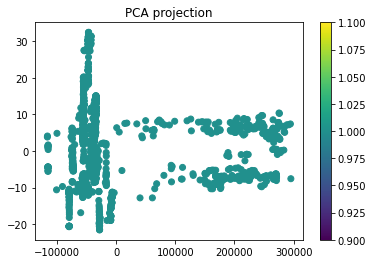

0.6649316851008459

In [ ]:
import sklearn
 

CV_results = cross_validate(MLPclassifierHost, HostInputs, HostTargets.ravel(), cv=20,return_train_score=True)
training = CV_results["train_score"]
testing = CV_results["test_score"]
plt.boxplot([training, testing])
plt.xticks([1, 2], ['training', 'testing'])
plt.show()
labels = [0,1]
c = sklearn.metrics.confusion_matrix(Y_Host_test, Y_Pred_MLPHost, labels=labels)
ax= plt.subplot()
plt.title('Confusion matrix of the classifier')
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
cmap = plt.get_cmap('Blues')
im = plt.imshow(c, cmap=cmap, interpolation='nearest')
plt.colorbar(im)
plt.show()
pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(X_Host_test)
plt.figure()
plt.scatter(compressed[:,0], compressed[:,1], c=Y_Pred_MLPHost, cmap="viridis")
plt.colorbar()
plt.title("PCA projection")
plt.show()
sklearn.metrics.f1_score(Y_Host_test, Y_Pred_MLPHost)

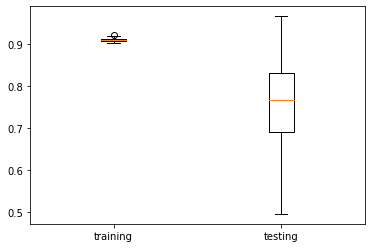

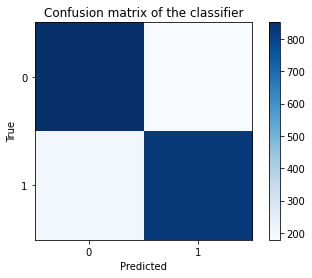

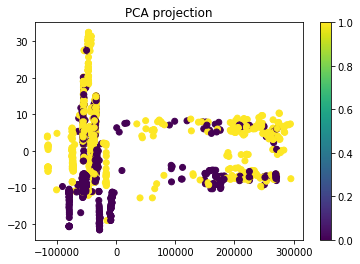

0.814997533300444

In [ ]:
import sklearn
 

CV_results = cross_validate(KNNclassifierHost, HostInputs, HostTargets.ravel(), cv=20,return_train_score=True)
training = CV_results["train_score"]
testing = CV_results["test_score"]
plt.boxplot([training, testing])
plt.xticks([1, 2], ['training', 'testing'])
plt.show()
labels = [0,1]
c = sklearn.metrics.confusion_matrix(Y_Host_test, Y_Pred_KNNHost, labels=labels)
ax= plt.subplot()
plt.title('Confusion matrix of the classifier')
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
cmap = plt.get_cmap('Blues')
im = plt.imshow(c, cmap=cmap, interpolation='nearest')
plt.colorbar(im)
plt.show()
pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(X_Host_test)
plt.figure()
plt.scatter(compressed[:,0], compressed[:,1], c=Y_Pred_KNNHost, cmap="viridis")
plt.colorbar()
plt.title("PCA projection")
plt.show()
sklearn.metrics.f1_score(Y_Host_test, Y_Pred_KNNHost)

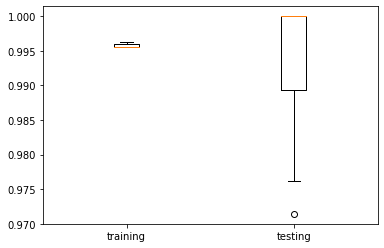

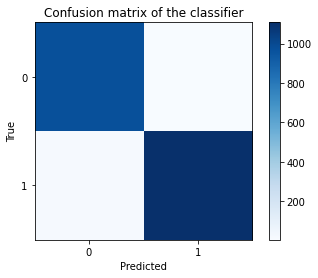

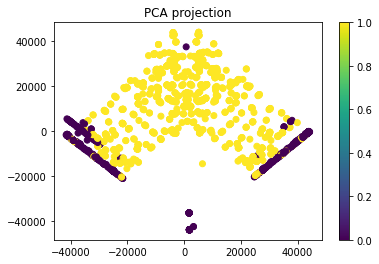

0.9910554561717353

In [ ]:
import sklearn
 

CV_results = cross_validate(RFclassifierNetFlowPort, NetFlowInputsPorts, NetFlowTargets.ravel(), cv=20,return_train_score=True)
training = CV_results["train_score"]
testing = CV_results["test_score"]
plt.boxplot([training, testing])
plt.xticks([1, 2], ['training', 'testing'])
plt.show()
labels = [0,1]
c = sklearn.metrics.confusion_matrix(Y_test_Ports, Y_Pred_RFNetFlowPort, labels=labels)
ax= plt.subplot()
plt.title('Confusion matrix of the classifier')
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
cmap = plt.get_cmap('Blues')
im = plt.imshow(c, cmap=cmap, interpolation='nearest')
plt.colorbar(im)
plt.show()
pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(X_test_Ports)
plt.figure()
plt.scatter(compressed[:,0], compressed[:,1], c=Y_Pred_RFNetFlowPort, cmap="viridis")
plt.colorbar()
plt.title("PCA projection")
plt.show()
sklearn.metrics.f1_score(Y_test_Ports, Y_Pred_RFNetFlowPort)

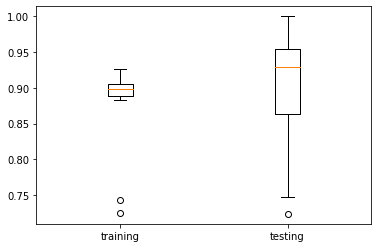

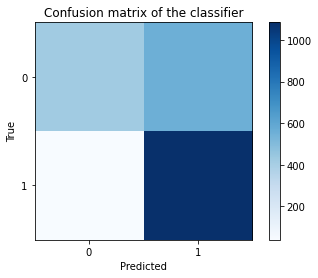

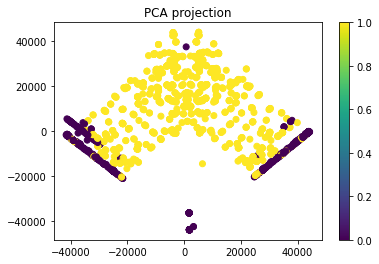

0.7846543612015925

In [ ]:
import sklearn
 

CV_results = cross_validate(MLPclassifierNetFlowPort, NetFlowInputsPorts, NetFlowTargets.ravel(), cv=20,return_train_score=True)
training = CV_results["train_score"]
testing = CV_results["test_score"]
plt.boxplot([training, testing])
plt.xticks([1, 2], ['training', 'testing'])
plt.show()
labels = [0,1]
c = sklearn.metrics.confusion_matrix(Y_test_Ports, Y_Pred_MLPNetFlowPort, labels=labels)
ax= plt.subplot()
plt.title('Confusion matrix of the classifier')
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
cmap = plt.get_cmap('Blues')
im = plt.imshow(c, cmap=cmap, interpolation='nearest')
plt.colorbar(im)
plt.show()
pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(X_test_Ports)
plt.figure()
plt.scatter(compressed[:,0], compressed[:,1], c=Y_Pred_RFNetFlowPort, cmap="viridis")
plt.colorbar()
plt.title("PCA projection")
plt.show()
sklearn.metrics.f1_score(Y_test_Ports, Y_Pred_MLPNetFlowPort)

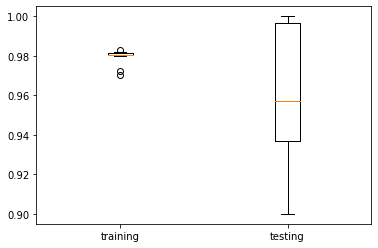

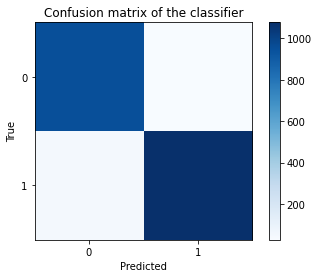

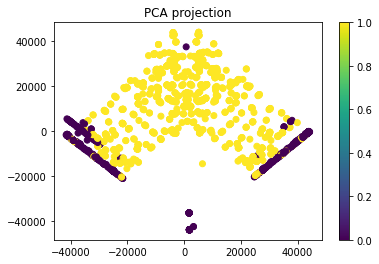

0.9667863554757631

In [ ]:
import sklearn
 

CV_results = cross_validate(KNNclassifierNetFlowPort, NetFlowInputsPorts, NetFlowTargets.ravel(), cv=20,return_train_score=True)
training = CV_results["train_score"]
testing = CV_results["test_score"]
plt.boxplot([training, testing])
plt.xticks([1, 2], ['training', 'testing'])
plt.show()
labels = [0,1]
c = sklearn.metrics.confusion_matrix(Y_test_Ports, Y_Pred_KNNNetFlowPort, labels=labels)
ax= plt.subplot()
plt.title('Confusion matrix of the classifier')
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.xlabel('Predicted')
plt.ylabel('True')
cmap = plt.get_cmap('Blues')
im = plt.imshow(c, cmap=cmap, interpolation='nearest')
plt.colorbar(im)
plt.show()
pca = sklearn.decomposition.PCA(n_components=2)
compressed = pca.fit_transform(X_test_Ports)
plt.figure()
plt.scatter(compressed[:,0], compressed[:,1], c=Y_Pred_RFNetFlowPort, cmap="viridis")
plt.colorbar()
plt.title("PCA projection")
plt.show()
sklearn.metrics.f1_score(Y_test_Ports, Y_Pred_KNNNetFlowPort)